In [1]:
# adapted from https://www.kaggle.com/lextoumbourou/humpback-whale-id-data-and-aug-exploration

import math
from collections import Counter
import keras

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

%matplotlib inline

Using TensorFlow backend.


In [2]:
DATA_DIR = './data'

In [3]:
def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(f'{DATA_DIR}/train/{filename}') for filename in filenames]
    
    return plot_images(imgs, labels, rows)


def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

In [4]:
np.random.seed(42)

In [5]:
train_df = pd.read_csv('./train.csv')
train_df.head(10)

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
5,0025e8c2.jpg,w_8b1ca89
6,0026a8ab.jpg,w_eaad6a8
7,0031c258.jpg,new_whale
8,0035632e.jpg,w_3d0bc7a
9,0037e7d3.jpg,w_50db782


In [12]:
rand_rows = train_df.sample(frac=1.)[:20]

imgs = list(rand_rows['Image'])
labels = list(rand_rows['Id'])

plot_images_for_filenames(imgs, labels)

NameError: name 'plot_images_for_filenames' is not defined

In [13]:
num_categories = len(train_df['Id'].unique())

print(f'Number of categories: {num_categories}')

SyntaxError: invalid syntax (<ipython-input-13-6e9aaed843a7>, line 3)

In [15]:
size_buckets = Counter(train_df['Id'].value_counts().values)

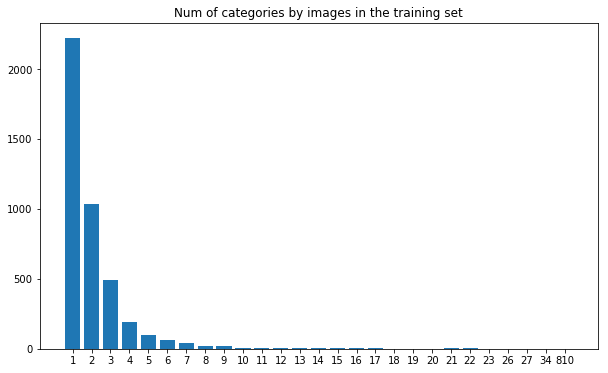

In [27]:
plt.figure(figsize=(10, 6))

plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")

plt.show()

# Note how many labels have a single image

In [42]:
train_df['Id'].value_counts().head(5)

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
Name: Id, dtype: int64

In [46]:
total = len(train_df['Id'])
print(f'total images: {total}')

uniq_whales = len(train_df['Id'].unique())
print(f'Number of unique whales: {uniq_whales}')

total images: 9850
Number of unique whales: 4251


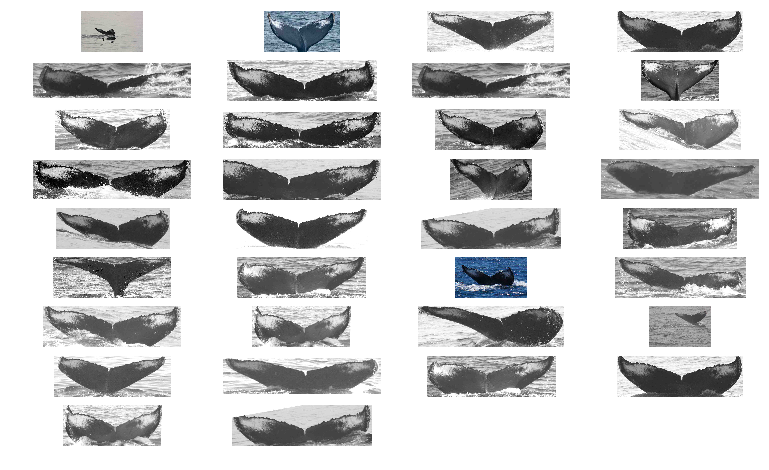

In [48]:
w_1287fbc = train_df[train_df['Id'] == 'w_1287fbc']
plot_images_for_filenames(w_1287fbc['Image'], None, rows=9)

In [50]:
def plot_whale(id, rows = 9):
    whales = train_df[train_df['Id'] == id]
    plot_images_for_filenames(w_1287fbc['Image'], None, rows)

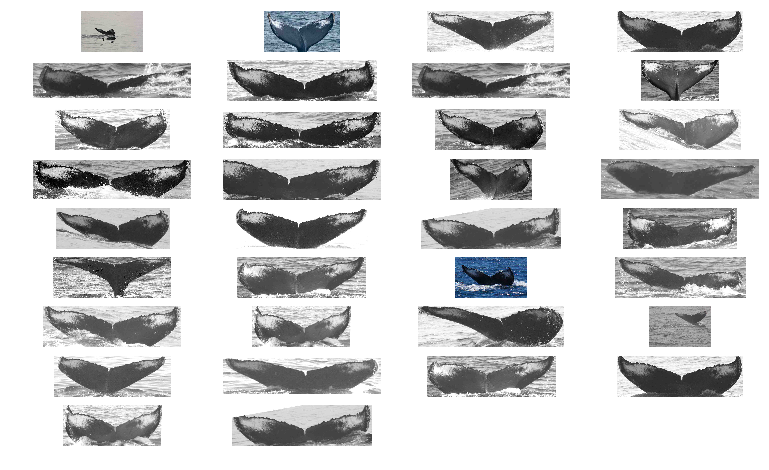

In [51]:
plot_whale('w_1287fbc')

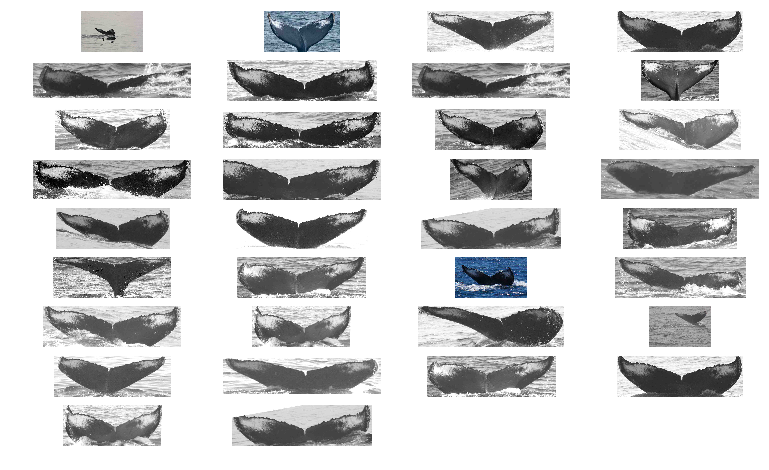

In [52]:
plot_whale('w_98baff9')

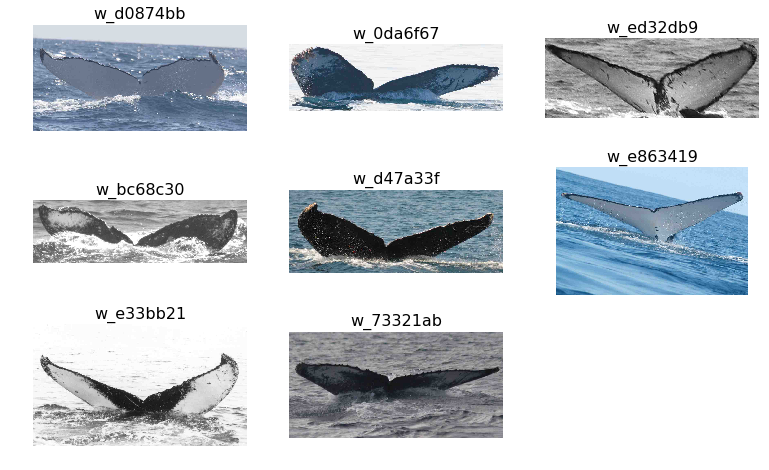

In [58]:
one_image_ids = train_df['Id'].value_counts().tail(8).keys()
one_image_filenames = []
labels = []

for i in one_image_ids:
    labels.append(i)
    one_image_filenames.extend(list(train_df[train_df['Id'] == i]['Image']))
    
                               
plot_images_for_filenames(one_image_filenames, labels, rows=3)

In [59]:
def is_grey_scale(img_path):
    """Thanks to https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

In [61]:
is_grey = [is_grey_scale(f'{DATA_DIR}/train/{i}') for i in train_df['Image'].sample(frac=.2)]
grey_perc = round(sum([i for i in is_grey]) / len([i for i in is_grey]) * 100, 2)
print(f"% of grey images: {grey_perc}")

% of grey images: 51.52


In [63]:
img_sizes = Counter([Image.open(f'{DATA_DIR}/train/{i}').size for i in train_df['Image']])
print(img_sizes)

Counter({(1050, 600): 1113, (1050, 700): 951, (1050, 450): 409, (1050, 525): 371, (700, 500): 200, (1000, 667): 122, (1050, 630): 114, (1000, 652): 85, (900, 600): 72, (1050, 599): 44, (700, 400): 41, (1050, 591): 37, (1050, 750): 32, (1050, 347): 24, (1050, 384): 21, (1050, 255): 20, (1050, 298): 20, (1050, 367): 19, (1050, 346): 19, (1000, 666): 19, (1050, 701): 19, (1050, 451): 19, (900, 599): 19, (1050, 675): 19, (1050, 329): 19, (1050, 321): 19, (1050, 315): 19, (1050, 308): 18, (1050, 326): 18, (1050, 296): 18, (1050, 332): 18, (1050, 333): 18, (700, 450): 18, (1050, 301): 18, (1050, 341): 18, (1050, 253): 18, (1050, 368): 17, (1050, 317): 17, (1050, 601): 17, (1050, 408): 17, (1050, 383): 17, (920, 600): 17, (1050, 373): 17, (1050, 366): 17, (1050, 345): 17, (1050, 307): 16, (1050, 270): 16, (1050, 289): 16, (1050, 363): 16, (1050, 275): 16, (1050, 393): 16, (1050, 304): 16, (1050, 695): 16, (1050, 335): 16, (1050, 306): 16, (1050, 309): 16, (1050, 294): 15, (1050, 430): 15, (10

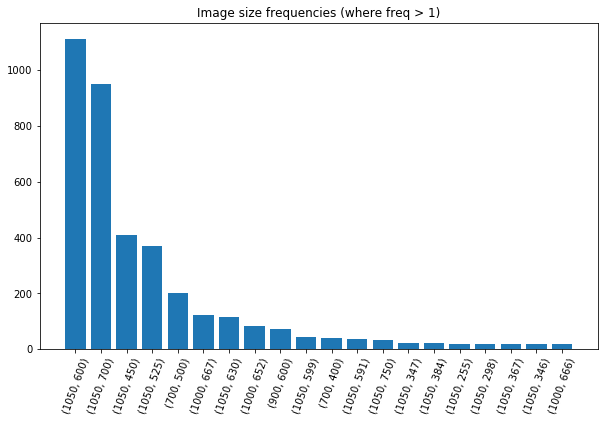

In [64]:
size, freq = zip(*Counter({i: v for i, v in img_sizes.items() if v > 1}).most_common(20))

plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)
plt.title("Image size frequencies (where freq > 1)")

plt.show()

In [6]:
from keras.preprocessing.image import (
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift, transform_matrix_offset_center, img_to_array)

In [7]:
img = Image.open(f'{DATA_DIR}/train/ff38054f.jpg')

In [13]:
img_arr = img_to_array(img)

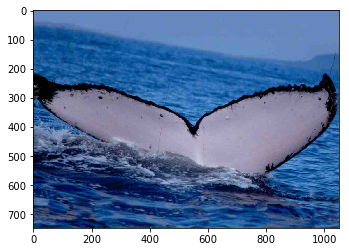

In [9]:
plt.imshow(img)

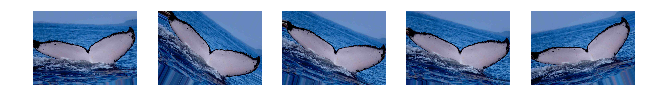

In [10]:
imgs = [
    random_rotation(img_arr, 30, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

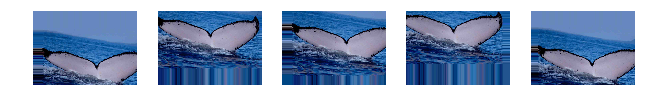

In [14]:
imgs = [
    random_shift(img_arr, wrg=0.1, hrg=0.3, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

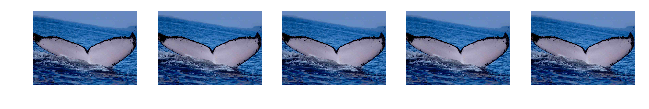

In [15]:
imgs = [
    random_shear(img_arr, intensity=0.4, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

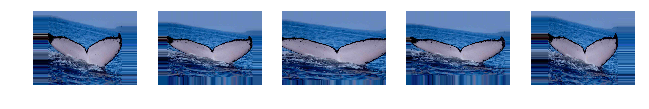

In [16]:
imgs = [
    random_zoom(img_arr, zoom_range=(1.5, 0.7), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

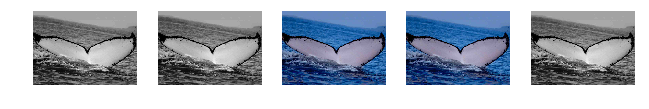

In [17]:
import random

def random_greyscale(img, p):
    if random.random() < p:
        return np.dot(img[...,:3], [0.299, 0.587, 0.114])
    
    return img

imgs = [
    random_greyscale(img_arr, 0.5) * 255
    for _ in range(5)]

plot_images(imgs, None, rows=1)

In [18]:
def augmentation_pipeline(img_arr):
    img_arr = random_rotation(img_arr, 18, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_shear(img_arr, intensity=0.4, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_zoom(img_arr, zoom_range=(0.9, 2.0), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_greyscale(img_arr, 0.4)

    return img_arr

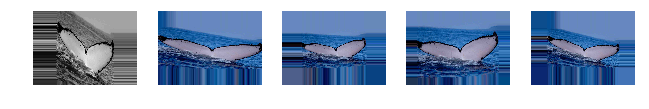

In [21]:
imgs = [augmentation_pipeline(img_arr) * 255 for _ in range(5)]
plot_images(imgs, None, rows=1)